# Tuning Model

In [1]:
import model
import numpy as np
import pandas as pd
import tree
from sklearn.linear_model import LinearRegression

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load in Data
x_file = 'synthetic_data/batch_2/x_gen_syn_n3_p100_corr0.5_snr5.0_seed2022_0.csv'
y_file = 'synthetic_data/batch_2/y_gen_syn_n3_p100_corr0.5_snr5.0_seed2022_0.csv'
x = np.loadtxt(x_file, delimiter=",")
y = np.loadtxt(y_file, delimiter=",")
l0 = 0.01
l2 = 0

In [3]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to estimate coefficients (betas)
linear_model = LinearRegression()
linear_model.fit(x, y)

# Calculate the maximum absolute coefficient value
max_abs_beta = np.max(np.abs(linear_model.coef_))

# Calculate the optimal M value as 1.5 times the maximum absolute coefficient value
optimal_M = 1.5 * max_abs_beta

print(f"Optimal M: {optimal_M}")

Optimal M: 0.4901141216458462


# Retro Branching

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

### Rough Visualization of Tree Structure

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.1, vert_loc = 0, xcenter = 0.5):
    pos = _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
    return pos

def _hierarchy_pos(G, root, width=2., vert_gap = 0.1, vert_loc = 0, xcenter = 0.5, pos = None, parent = None, parsed = []):
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    
    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph) and parent is not None:
        children.remove(parent)  
            
    if len(children) != 0:
        dx = width / len(children) 
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos = _hierarchy_pos(G, child, width = dx, vert_gap = vert_gap, vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos, parent=root, parsed=parsed)
    
    return pos

def visualize_tree(root):
    if not root:
        return

    tree_graph = nx.DiGraph()

    def add_nodes_edges(node):
        if node.left:
            tree_graph.add_edge(node.node_key, node.left.node_key)
            add_nodes_edges(node.left)
        if node.right:
            tree_graph.add_edge(node.node_key, node.right.node_key)
            add_nodes_edges(node.right)

    add_nodes_edges(root)

    pos = hierarchy_pos(tree_graph, root.node_key)
    nx.draw(tree_graph, pos=pos, with_labels=True, node_size=100, node_color="skyblue", font_size=6, font_weight='bold')
    plt.title("Binary Tree Visualization")
    plt.show()

In [5]:
# Solve using Branch and Bound
i, reward = tree.branch_and_bound(x,y,l0,l2)

# def count_nodes(node):
#     """Count the number of nodes in the tree."""
#     if not node:
#         return 0
#     return 1 + count_nodes(node.left) + count_nodes(node.right)

print(f'Number of iterations: {i}')
# print(f'Number of Nodes in Tree: {count_nodes(test_tree.root)}')
# pairs = tree.get_state_pairs(test_tree.root)
# print(f'Number of Edges/State Pairs: {len(pairs)}')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Number of iterations: 1000


In [6]:
#initialize agent
agent = model.Agent()

In [ ]:
# Solve Using RL Agent
iters, tot_reward, nnz = model.RL_solve(agent, x, y, l0, l2)

print(f'Iterations This Episode: {iters}')
print(f'Total Reward this Episode: {tot_reward}')
print(f'Number of Items in Memory: {len(agent.memory.memory)}')
print("-----------------------------------------")
print(f'Episodes Played: {agent.episodes_played}')
print(f'Epsilon: {round(agent.epsilon,4)}')

# Crude Visualization of Tree
# visualize_tree(test_tree.root)

Iterations This Episode: 1000
Total Reward this Episode: -999
Number of Items in Memory: 2000
-----------------------------------------
Episodes Played: 1
Epsilon: 0.99


In [9]:
print(f'Number of Non-Zero Coeffs: {nnz}')

Number of Non-Zero Coeffs: 45


Episode 0 - Total Reward: -47, Iterations: 48
Episode 10 - Total Reward: -35, Iterations: 36
Episode 20 - Total Reward: -46, Iterations: 47
Episode 30 - Total Reward: -30, Iterations: 31
Episode 40 - Total Reward: -27, Iterations: 28
Episode 50 - Total Reward: -22, Iterations: 23
Episode 60 - Total Reward: -70, Iterations: 71
Episode 70 - Total Reward: -44, Iterations: 45
Episode 80 - Total Reward: -71, Iterations: 72
Episode 90 - Total Reward: -40, Iterations: 41


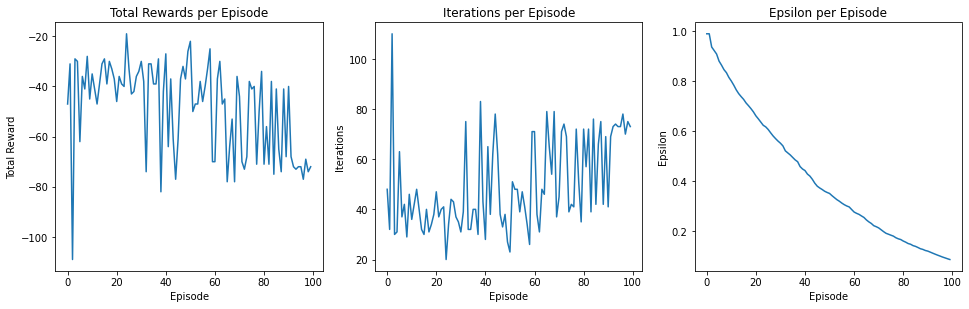

In [9]:
import matplotlib.pyplot as plt

# Initialize New Agent
agent = model.Agent()

total_rewards = []
iterations_per_episode = []
epsilons = []

# Play through 100 episodes
for episode in range(100):
    iters, tot_reward, test_tree = model.RL_solve(agent, x, y, l0, l2)
    total_rewards.append(tot_reward)
    iterations_per_episode.append(iters)
    epsilons.append(agent.epsilon)
    if episode % 10 == 0:
        print(f"Episode {episode} - Total Reward: {tot_reward}, Iterations: {iters}")

# Plotting the results
plt.figure(figsize=(18, 8))

plt.subplot(2, 4, 1)
plt.plot(total_rewards)
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

plt.subplot(2, 4, 2)
plt.plot(iterations_per_episode)
plt.title('Iterations per Episode')
plt.xlabel('Episode')
plt.ylabel('Iterations')

plt.subplot(2, 4, 3)
plt.plot(epsilons)
plt.title('Epsilon per Episode')
plt.xlabel('Episode')
plt.ylabel('Epsilon')

plt.tight_layout()
plt.show()